<a href="https://colab.research.google.com/github/tomfox1/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS3_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
# dir(stats)

In [16]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [17]:
# And a new friend - t
t1 = stats.t(30)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.0350983390135313
1.0714285714285714


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [18]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [19]:
lambda_heights = [72,72,77,72,73,67,64,58,63,78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.head(10)       

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [20]:
df.heights.mean()

69.6

In [21]:
import random 
random.seed(10)

population = []

for _ in range(1000):
  population.append(random.randint(0,1))

print(population)   
print(len(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [22]:
sample = random.sample(population, 100)
print(sample)
print(len(sample))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
100


In [23]:
df = pd.DataFrame({"likes_coke": sample})
df.head()

df.likes_coke.mean()

0.46

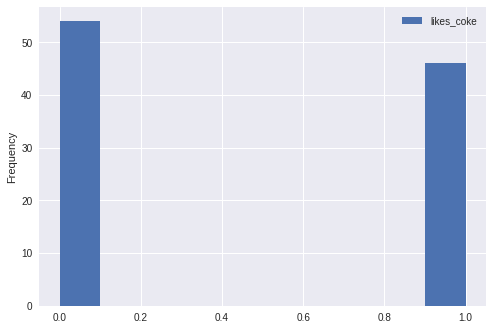

In [24]:
df.plot.hist();

In [25]:
df.likes_coke.describe()

count    100.000000
mean       0.460000
std        0.500908
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

In [26]:
import numpy as np

def mean(list):
  average = np.sum(list)/len(list)
  return average

print("Population Mean:", mean(population))
print("Sample Mean:", mean(sample))

Population Mean: 0.507
Sample Mean: 0.46


In [27]:
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)
  
variance(df.likes_coke)

0.25090909090909086

In [28]:
def stddev(list):
  var = variance(list)
  return var**(1/2) 

stddev(df.likes_coke)

0.5009082659620331

<img src="https://www.ahajournals.org/cms/attachment/850f8023-e028-4694-a946-bbdbdaa9009b/15mm6.jpg"  width='200'/>

In [29]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - .5)/(stddev(df.likes_coke)/n**(1/2))
print(t_stat)

-0.7985494095046901


In [70]:
dir(scipy.stats)
scipy.stats.ttest_1samp(df['likes_coke'], .5)

NameError: ignored

\begin{align}
t = \frac{\text{variance between groups}}{\text{variance within groups}}
\end{align}

## P-Value

P-value is a threshold that we set for ourselves to denote "statistical significance" Statistical Significance means - the odds of me getting unlucky that I'm willing to deal with. The probability that I would have to see that says that these two differences are not just due to chance. 

5% - Will only accept this result as reliable or significant if I calculate that this outcome has a 5% chance or less of happening just due to chance.

The probability that the pattern in our data that we're seeing could be produced by random data.

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [33]:
from google.colab import files

uploaded = files.upload()

Saving house-votes-84.csv to house-votes-84 (2).csv


In [0]:
# Dataset is now stored in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded["house-votes-84.csv"]), header=None)


In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [37]:
headers= ["Class Name", 
"handicapped-infants",
"water-project-cost-sharing",
"adoption-of-the-budget-resolution",
"physician-fee-freeze",
"el-salvador-aid", 
"religious-groups-in-schools",
"anti-satellite-test-ban",
"aid-to-nicaraguan-contras",
"mx-missile",
"immigration",
"synfuels-corporation-cutback", 
"education-spending", 
"superfund-right-to-sue",
"crime",  
"duty-free-exports",
"export-administration-act-south-africa"]
len(headers)

17

In [0]:
df.columns = headers

In [39]:
df.isnull().sum()

Class Name                                0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [40]:
df = df.replace({"n": 0, "y": 1})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [0]:
#after wasting a lot of time I decided to drop rows that contained "?", I'm aware this is probably not the best way to do so 
df_clean = df[(df.astype(str) != '?').all(axis=1)]

In [54]:
len(df_clean), len(df)

(232, 435)

In [62]:
df_clean["handicapped-infants"].describe()

count     232
unique      2
top         0
freq      136
Name: handicapped-infants, dtype: int64

In [91]:
#dem support more then rep
ct = pd.crosstab(df_clean["Class Name"], df["hanicapped-infants"])
ct["mean"] = (ct[1]) / (ct[0] + ct[1])
ct

handicapped-infants,0,1,mean
Class Name,,,
democrat,51,73,0.588710
republican,85,23,0.212963


In [77]:
mean(df_clean["handicapped-infants"])

0.41379310344827586

In [97]:
tstat = (mean(df_clean["handicapped-infants"]) - .212)/(stddev(df_clean["handicapped-infants"])/n**(1/2))
tstat

4.088379775490651

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars